# Fashion selling data

**The problem**

Company A sells fashion. They have stores in each country’s capital: UK (London); FR (Paris); IT (Milan); GER (Berlin). Their customers either buy online or in the store itself. 
At the same time, it maintains a website of individual product pages with writeups and images about the page. In some cases, the page might have gone up after the product was put up for sale. 


**Target**

1.	What is the impact of our website traffic on revenue?     

2.	Which products get us pageviews and revenue?

3.	What customer segments are there?    




# Import Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt
import scipy.stats as stats

from datetime import date
from termcolor import colored


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score

#from yellowbrick.cluster import KElbowVisualizer


print('OK')

OK


 # Loading Data

## Customers

In [3]:
customer_info = pd.read_excel("E:\\MindX\\Khóa 4 - DA Summary\\Buổi 8\\Fashion selling data\\customers (UK).xlsx",sheet_name=0)

customer_info.head()

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,0.0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N
1,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y
2,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y
3,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N
4,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N


In [4]:
items = pd.read_excel('E:\\MindX\\Khóa 4 - DA Summary\\Buổi 8\\Fashion selling data\\customers (UK).xlsx',sheet_name=1)

items.head()

,ItemID,Product,Brand,SellPrice,CostPrice
0,1.0,032irview0.686128260621012,"Ki)D3jDmA,RIP68X",943.0,359.0
1,2.0,070ttream0.518887735674677,GO4582ey<S!+k1VE,717.0,207.0
2,3.0,070htream0.333307794468401,G.Kb^jz*soY!(-4Q,739.0,199.0
3,4.0,100Grseys0.271522111052549,Dr|vm[-5p~56Y\mk,532.0,262.0
4,5.0,100[nside0.645837365801341,Dr|vm[-5p~56Y\mk,593.0,392.0


In [5]:
customer_transactions = pd.read_excel('E:\\MindX\\Khóa 4 - DA Summary\\Buổi 8\\Fashion selling data\\customers (UK).xlsx',sheet_name=2)

customer_transactions.head()

,OrderID,CustomerID,ItemID,TransactionDate,Channel
0,0.0,0.0,352.0,2020-03-21,In Store
1,0.0,0.0,3433.0,2020-07-14,In Store
2,0.0,0.0,11162.0,2020-08-09,In Store
3,0.0,0.0,13011.0,2020-12-07,In Store
4,0.0,0.0,13885.0,2020-11-08,In Store


## Traffics

In [6]:
traffic_01 = pd.read_excel(r'E:\MindX\Khóa 4 - DA Summary\Buổi 8\Fashion selling data\Traffic\2020_01.xlsx',sheet_name=0)
traffic_02 = pd.read_excel(r'E:\MindX\Khóa 4 - DA Summary\Buổi 8\Fashion selling data\Traffic\2020_02.xlsx',sheet_name=0)
traffic_03 = pd.read_excel(r'E:\MindX\Khóa 4 - DA Summary\Buổi 8\Fashion selling data\Traffic\2020_03.xlsx',sheet_name=0)
traffic_04 = pd.read_excel(r'E:\MindX\Khóa 4 - DA Summary\Buổi 8\Fashion selling data\Traffic\2020_04.xlsx',sheet_name=0)
traffic_05 = pd.read_excel(r'E:\MindX\Khóa 4 - DA Summary\Buổi 8\Fashion selling data\Traffic\2020_05.xlsx',sheet_name=0)
traffic_06 = pd.read_excel(r'E:\MindX\Khóa 4 - DA Summary\Buổi 8\Fashion selling data\Traffic\2020_06.xlsx',sheet_name=0)
traffic_07 = pd.read_excel(r'E:\MindX\Khóa 4 - DA Summary\Buổi 8\Fashion selling data\Traffic\2020_07.xlsx',sheet_name=0)
traffic_08 = pd.read_excel(r'E:\MindX\Khóa 4 - DA Summary\Buổi 8\Fashion selling data\Traffic\2020_08.xlsx',sheet_name=0)
traffic_09 = pd.read_excel(r'E:\MindX\Khóa 4 - DA Summary\Buổi 8\Fashion selling data\Traffic\2020_09.xlsx',sheet_name=0)
traffic_10 = pd.read_excel(r'E:\MindX\Khóa 4 - DA Summary\Buổi 8\Fashion selling data\Traffic\2020_10.xlsx',sheet_name=0)
traffic_11 = pd.read_excel(r'E:\MindX\Khóa 4 - DA Summary\Buổi 8\Fashion selling data\Traffic\2020_11.xlsx',sheet_name=0)
traffic_12 = pd.read_excel(r'E:\MindX\Khóa 4 - DA Summary\Buổi 8\Fashion selling data\Traffic\2020_12.xlsx',sheet_name=0)

In [7]:
traffics = pd.concat([traffic_01, traffic_02,traffic_03,traffic_04,traffic_05,\
                     traffic_06,traffic_07,traffic_08,traffic_09,traffic_10,traffic_11,traffic_12],\
                    ignore_index=True)

In [8]:
traffics

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY)
0,/2020/1/032irview0.686128260621012,5669.2,5777.8,6286.4,"Ki)D3jDmA,RIP68X",2020-01-10 16:56:13
1,/2020/1/070ttream0.518887735674677,359.8,370.4,403.4,GO4582ey<S!+k1VE,2020-01-10 05:04:35
2,/2020/1/070htream0.333307794468401,587.6,614.2,657.6,G.Kb^jz*soY!(-4Q,2020-01-16 23:27:08
3,/2020/1/100Grseys0.271522111052549,1284.0,1308.6,1385.4,Dr|vm[-5p~56Y\mk,2020-01-17 12:32:24
4,/2020/1/100[nside0.645837365801341,1846.0,1880.8,2025.0,Dr|vm[-5p~56Y\mk,2020-01-23 05:21:08
...,...,...,...,...,...,...
17884,/2020/12/yinfbowls0.6558670149224,130.0,133.2,142.2,HoXbja)_x007f_qT:ESE8#,2020-12-01 04:55:35
17885,/2020/12/yosolease0.0455049365834417,314.6,325.6,365.2,"YoRQW7@*&5W+~4Y""",2020-12-03 15:25:00
17886,/2020/12/you^-info0.127669879156147,1419.6,1448.4,1615.8,"MouDd/fn,XEARhBp",2020-12-06 23:57:54
17887,/2020/12/youe-info0.729842478879044,483.8,487.6,509.6,"yo4}AUKGso=,?!DX",2020-12-04 05:59:22


In [40]:
# Slice Products in Page URL
traffics['Product'] = range(len(traffics['Page URL']))
for i in range(len(traffics['Page URL'])):
    traffics['Product'][i] = traffics['Page URL'].iloc[i].split('/')[-1]

C:\Users\Admin\AppData\Local\Temp/ipykernel_22396/1252379896.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffics['Product'][i] = traffics['Page URL'].iloc[i].split('/')[-1]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [41]:
traffics.sort_values('Posted On (DD/MM/YYYY)', ascending=True, inplace=True, ignore_index=True)


In [42]:
traffics.head()

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY),Date,Product
0,/2020/1/vanBip-on0.100834672919284,1034.8,1048.4,1134.4,"Vag9""-Z=gN30ND@[",2020-01-01 01:03:02,2020-01-01,vanBip-on0.100834672919284
1,/2020/1/fujBdence0.385183712192661,4097.8,4142.6,4457.2,ToOYo&o|?(;MH>V:,2020-01-01 01:46:40,2020-01-01,fujBdence0.385183712192661
2,/2020/1/baiXpsule0.236876019278184,642.6,653.8,726.8,PaasB'\_LlDEk`=W,2020-01-01 02:55:07,2020-01-01,baiXpsule0.236876019278184
3,/2020/1/artjriner0.183950395687591,3413.0,3469.6,3795.6,Ro7|R40![FY$PS`<,2020-01-01 04:18:00,2020-01-01,artjriner0.183950395687591
4,/2020/1/appMn-usd0.284138838758011,1447.0,1465.6,1562.6,MiUNo1$pZkrlcw>M,2020-01-01 04:35:14,2020-01-01,appMn-usd0.284138838758011


In [43]:
#merge data

data = customer_transactions.merge(customer_info,how='inner',left_on='CustomerID', right_on='ID').\
                    merge(items,how='inner',left_on='ItemID', right_on='ItemID')


In [44]:
data.drop('ID', inplace=True, axis=1)

In [45]:
data

,OrderID,CustomerID,ItemID,TransactionDate,Channel,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter,Product,Brand,SellPrice,CostPrice
0,0.0,0.0,352.0,2020-03-21,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735.0,426.0
1,637.0,57.0,352.0,2020-03-15,In Store,Var0.0876970591979241,Bhan0.0592432181453122,GER - Germany,2016-02-02,F,1966-01-14,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735.0,426.0
2,0.0,0.0,3433.0,2020-07-14,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963.0,491.0
3,1840.0,167.0,3433.0,2020-05-16,In Store,Y0.694526245425698,Pur0.889218979929135,UK - United Kingdom,2015-04-16,M,1972-03-23,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963.0,491.0
4,3386.0,307.0,3433.0,2020-04-23,In Store,Moh0.478682882191102,Khair0.475794987205303,FR - France,2016-06-02,NaN,1989-05-04,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963.0,491.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25208,8358.0,769.0,15836.0,2020-10-14,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,offqrview0.479298708383635,Vi1[g>Gp]F76d[;',197.0,146.0
25209,8359.0,769.0,5847.0,2020-05-27,Online,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,nnactream0.0225798759099386,"NN`~?6_x007f_^%O*KH,[S",833.0,280.0
25210,8362.0,769.0,8727.0,2020-11-18,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,g-snation0.0993461911005428,WaQqK)2JxI(=dac=,205.0,66.0
25211,8362.0,769.0,13065.0,2020-05-11,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,undflease0.156012002899051,"Uny~Y,~<rTC^J6py",1012.0,272.0


In [14]:
data.columns

Index(['OrderID', 'CustomerID', 'ItemID', 'TransactionDate', 'Channel',
       'FirstName', 'LastName', 'Country', 'DateJoined', 'Gender', 'Birthday',
       'Newsletter', 'Product', 'Brand', 'SellPrice', 'CostPrice'],
      dtype='object')

In [15]:
data.dtypes

OrderID                   float64
CustomerID                float64
ItemID                    float64
TransactionDate    datetime64[ns]
Channel                    object
FirstName                  object
LastName                   object
Country                    object
DateJoined         datetime64[ns]
Gender                     object
Birthday           datetime64[ns]
Newsletter                 object
Product                    object
Brand                      object
SellPrice                 float64
CostPrice                 float64
dtype: object

# Questions

## What is the impact of our website traffic on revenue?

### users, uniquePageviews, pageviews by Date

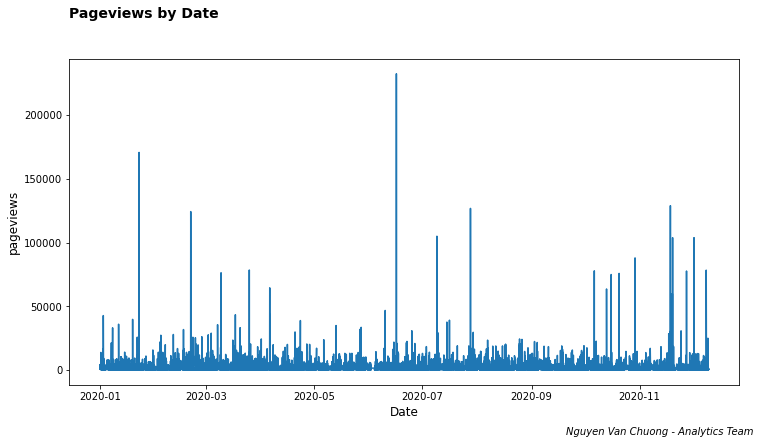

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(traffics['Posted On (DD/MM/YYYY)'],traffics['pageviews'],)

# Adding title, label shafts and source:
plt.suptitle('Pageviews by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Date', size=12)
plt.ylabel('pageviews', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

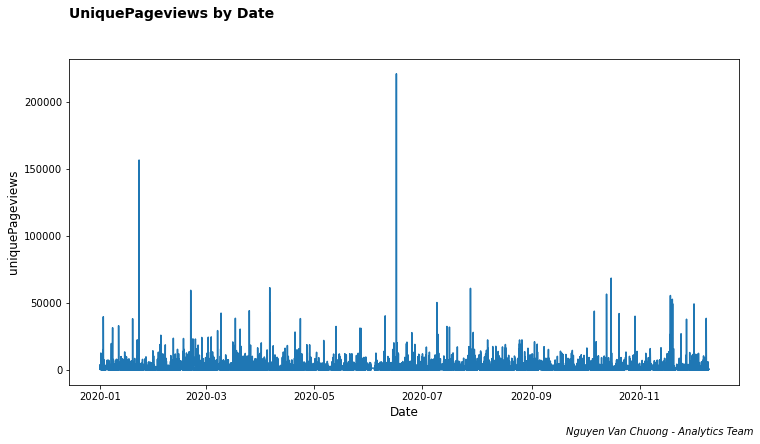

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(traffics['Posted On (DD/MM/YYYY)'],traffics['uniquePageviews'],)

# Adding title, label shafts and source:
plt.suptitle('UniquePageviews by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Date', size=12)
plt.ylabel('uniquePageviews', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

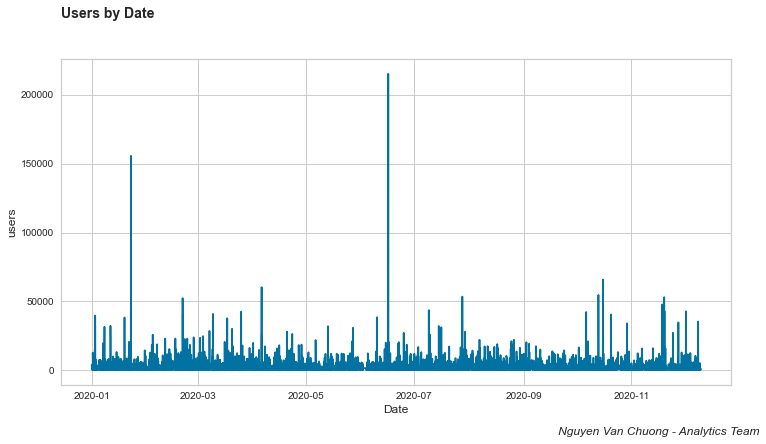

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(traffics['Posted On (DD/MM/YYYY)'],traffics['users'],)


# Adding title, label shafts and source:
plt.suptitle('Users by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Date', size=12)
plt.ylabel('users', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Conclusion:** Number of Users, UniquepageViews, PageViews tends to be unstable. And all three are not much different.

### Compare the number of orders, items and revenue between two channels: In Store and Online


In [18]:
summarize_trans = data.groupby(["TransactionDate","Channel"]).\
                            agg(total_orders = ('OrderID','nunique'),total_items = ('ItemID','size'), total_revenue = ('SellPrice','sum')).\
                            reset_index()

In [19]:
summarize_trans

,TransactionDate,Channel,total_orders,total_items,total_revenue
0,2020-01-01,In Store,30,30,23820.0
1,2020-01-01,Online,35,36,32044.0
2,2020-01-02,In Store,33,33,24069.0
3,2020-01-02,Online,40,40,31612.0
4,2020-01-03,In Store,46,46,37118.0
...,...,...,...,...,...
643,2020-12-25,Online,43,43,31365.0
644,2020-12-26,In Store,28,28,23072.0
645,2020-12-26,Online,39,41,33473.0
646,2020-12-27,In Store,45,45,37629.0


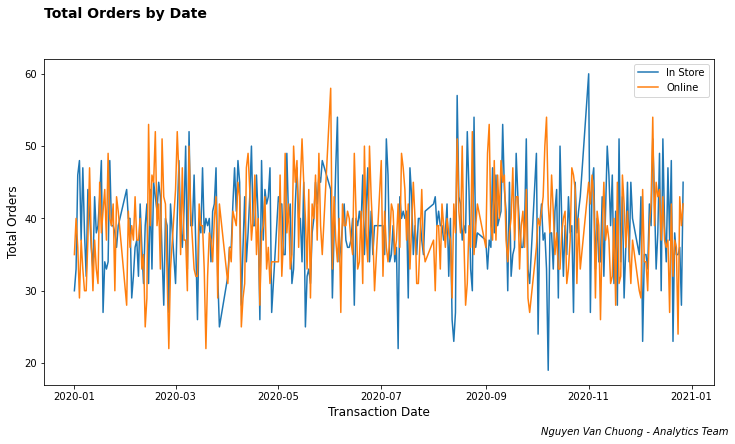

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(summarize_trans[summarize_trans["Channel"] == "In Store"].TransactionDate,\
        summarize_trans[summarize_trans["Channel"] == "In Store"].total_orders, \
       label="In Store")

ax.plot(summarize_trans[summarize_trans["Channel"] == "Online"].TransactionDate,\
        summarize_trans[summarize_trans["Channel"] == "Online"].total_orders, \
       label="Online")

plt.legend()
# Adding title, label shafts and source:
plt.suptitle('Total Orders by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Transaction Date', size=12)
plt.ylabel('Total Orders', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Conclusion:** there is no difference in the number of products sold by date through two online channels Online and In Store. 

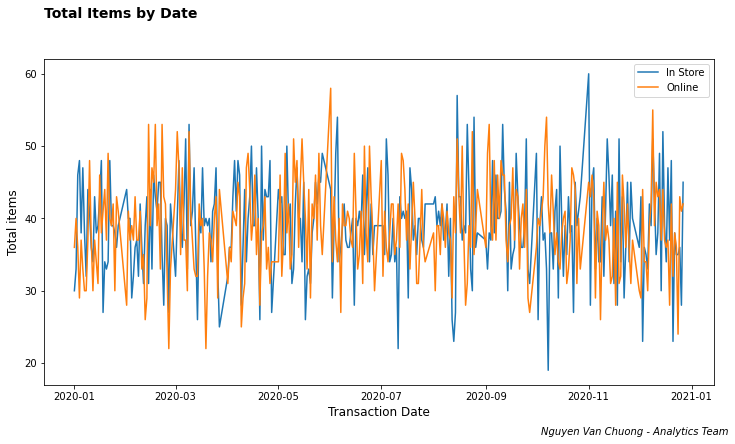

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(summarize_trans[summarize_trans["Channel"] == "In Store"].TransactionDate,\
        summarize_trans[summarize_trans["Channel"] == "In Store"].total_items, \
       label="In Store")

ax.plot(summarize_trans[summarize_trans["Channel"] == "Online"].TransactionDate,\
        summarize_trans[summarize_trans["Channel"] == "Online"].total_items, \
       label="Online")

plt.legend()
# Adding title, label shafts and source:
plt.suptitle('Total Items by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Transaction Date', size=12)
plt.ylabel('Total items', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()


**Conclusion:** there is no difference in the number of items sold by date through two online channels Online and In Store. 

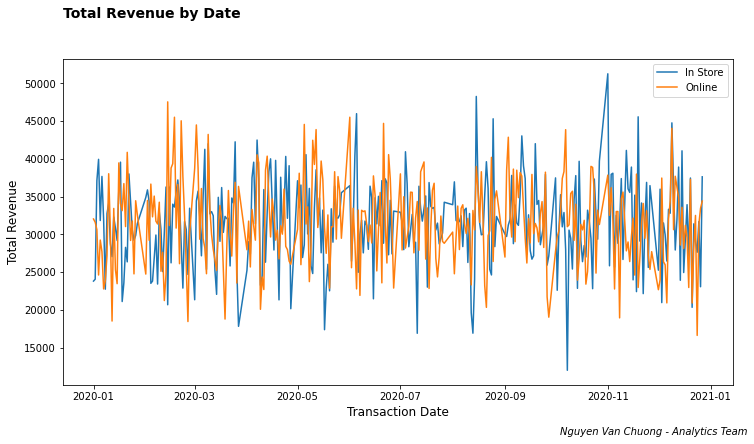

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(summarize_trans[summarize_trans["Channel"] == "In Store"].TransactionDate,\
        summarize_trans[summarize_trans["Channel"] == "In Store"].total_revenue, \
       label="In Store")

ax.plot(summarize_trans[summarize_trans["Channel"] == "Online"].TransactionDate,\
        summarize_trans[summarize_trans["Channel"] == "Online"].total_revenue, \
       label="Online")

plt.legend()
# Adding title, label shafts and source:
plt.suptitle('Total Revenue by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Transaction Date', size=12)
plt.ylabel('Total Revenue', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Conclusion:** there is no difference in the number of revenue sold by date through two online channels Online and In Store. 

**total_revenue & total_users**

In [46]:
revenue = data.groupby(["TransactionDate"], as_index=False)\
                        ["SellPrice"]\
                        .agg([np.sum]).reset_index().rename(columns={'sum':'total_revenue'})

In [47]:
revenue

,TransactionDate,total_revenue
0,2020-01-01,55864.0
1,2020-01-02,55681.0
2,2020-01-03,67753.0
3,2020-01-04,64573.0
4,2020-01-05,61098.0
...,...,...
319,2020-12-23,61634.0
320,2020-12-24,44266.0
321,2020-12-25,63062.0
322,2020-12-26,56545.0


In [50]:
traffics['Date'] = traffics['Posted On (DD/MM/YYYY)'].dt.date


In [51]:
traffics.head()

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY),Date,Product
0,/2020/1/vanBip-on0.100834672919284,1034.8,1048.4,1134.4,"Vag9""-Z=gN30ND@[",2020-01-01 01:03:02,2020-01-01,vanBip-on0.100834672919284
1,/2020/1/fujBdence0.385183712192661,4097.8,4142.6,4457.2,ToOYo&o|?(;MH>V:,2020-01-01 01:46:40,2020-01-01,fujBdence0.385183712192661
2,/2020/1/baiXpsule0.236876019278184,642.6,653.8,726.8,PaasB'\_LlDEk`=W,2020-01-01 02:55:07,2020-01-01,baiXpsule0.236876019278184
3,/2020/1/artjriner0.183950395687591,3413.0,3469.6,3795.6,Ro7|R40![FY$PS`<,2020-01-01 04:18:00,2020-01-01,artjriner0.183950395687591
4,/2020/1/appMn-usd0.284138838758011,1447.0,1465.6,1562.6,MiUNo1$pZkrlcw>M,2020-01-01 04:35:14,2020-01-01,appMn-usd0.284138838758011


In [27]:
summarize_traffic = traffics.groupby(["Date"]).\
                            agg(total_users = ('users','sum'), total_uniquePageviews = ('uniquePageviews','sum'), total_pageviews = ('pageviews','sum')).\
                            reset_index()

In [52]:
summarize_traffic

,Date,total_users,total_uniquePageviews,total_pageviews
0,2020-01-01,63755.4,64814.8,70353.6
1,2020-01-02,111861.4,113640.0,122557.8
2,2020-01-03,63749.8,65175.4,71058.0
3,2020-01-04,13946.0,14274.6,15349.6
4,2020-01-05,47065.0,47856.6,51438.2
...,...,...,...,...
338,2020-12-05,23906.0,24678.8,27024.6
339,2020-12-06,25892.8,26517.0,28433.4
340,2020-12-07,95081.8,97565.0,105456.0
341,2020-12-08,100577.0,105419.6,150902.2


In [53]:
summarize_traffic['Date'] = pd.to_datetime(summarize_traffic['Date'])

In [54]:
revenue_traffic = revenue.merge(summarize_traffic,how='inner',left_on='TransactionDate', right_on='Date')

In [55]:
revenue_traffic

,TransactionDate,total_revenue,Date,total_users,total_uniquePageviews,total_pageviews
0,2020-01-01,55864.0,2020-01-01,63755.4,64814.8,70353.6
1,2020-01-02,55681.0,2020-01-02,111861.4,113640.0,122557.8
2,2020-01-03,67753.0,2020-01-03,63749.8,65175.4,71058.0
3,2020-01-04,64573.0,2020-01-04,13946.0,14274.6,15349.6
4,2020-01-05,61098.0,2020-01-05,47065.0,47856.6,51438.2
...,...,...,...,...,...,...
300,2020-12-05,55953.0,2020-12-05,23906.0,24678.8,27024.6
301,2020-12-06,47406.0,2020-12-06,25892.8,26517.0,28433.4
302,2020-12-07,65365.0,2020-12-07,95081.8,97565.0,105456.0
303,2020-12-08,67222.0,2020-12-08,100577.0,105419.6,150902.2


In [56]:
revenue_traffic.drop('Date', inplace=True, axis=1)
revenue_traffic

,TransactionDate,total_revenue,total_users,total_uniquePageviews,total_pageviews
0,2020-01-01,55864.0,63755.4,64814.8,70353.6
1,2020-01-02,55681.0,111861.4,113640.0,122557.8
2,2020-01-03,67753.0,63749.8,65175.4,71058.0
3,2020-01-04,64573.0,13946.0,14274.6,15349.6
4,2020-01-05,61098.0,47065.0,47856.6,51438.2
...,...,...,...,...,...
300,2020-12-05,55953.0,23906.0,24678.8,27024.6
301,2020-12-06,47406.0,25892.8,26517.0,28433.4
302,2020-12-07,65365.0,95081.8,97565.0,105456.0
303,2020-12-08,67222.0,100577.0,105419.6,150902.2


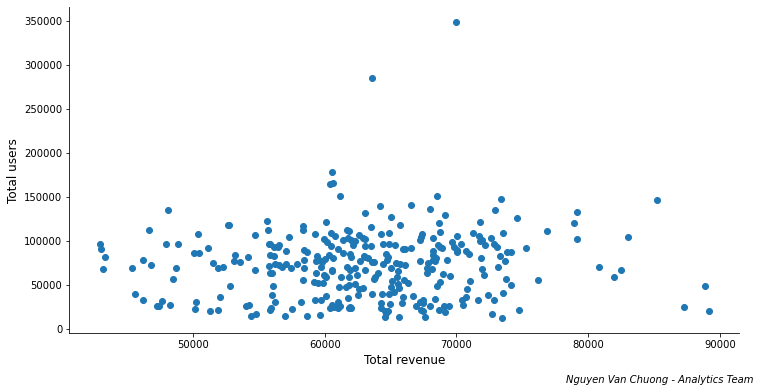

In [57]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(revenue_traffic['total_revenue'],revenue_traffic['total_users'])

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
plt.xlabel('Total revenue', size=12)
plt.ylabel('Total users', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

In [58]:
pearson_coef, p_value = stats.pearsonr(revenue_traffic['total_revenue'], revenue_traffic['total_users'])
print("Correlation Coefficient is", pearson_coef.round(3))
print("Values P-value is ", p_value.round(3))

Correlation Coefficient is 0.076
Values P-value is  0.184


**Conclusion:** Total_revenue and Total_users are not correlated with each other.

**total_revenue & total_uniquePageviews**

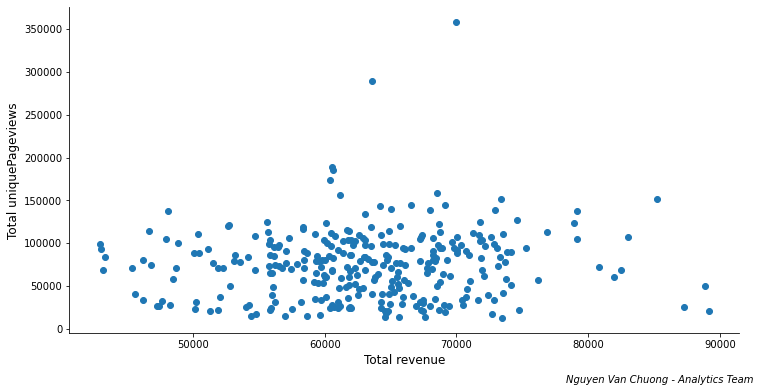

In [59]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(revenue_traffic['total_revenue'],revenue_traffic['total_uniquePageviews'])

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
plt.xlabel('Total revenue', size=12)
plt.ylabel('Total uniquePageviews', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

In [60]:
pearson_coef, p_value = stats.pearsonr(revenue_traffic['total_revenue'], revenue_traffic['total_uniquePageviews'])
print("Correlation Coefficient is", pearson_coef.round(3))
print("Values P-value is ", p_value.round(3))

Correlation Coefficient is 0.076
Values P-value is  0.188


**Conclusion:** Total_revenue and Total_users are not correlated with each other.

**total_revenue & total_pageviews**

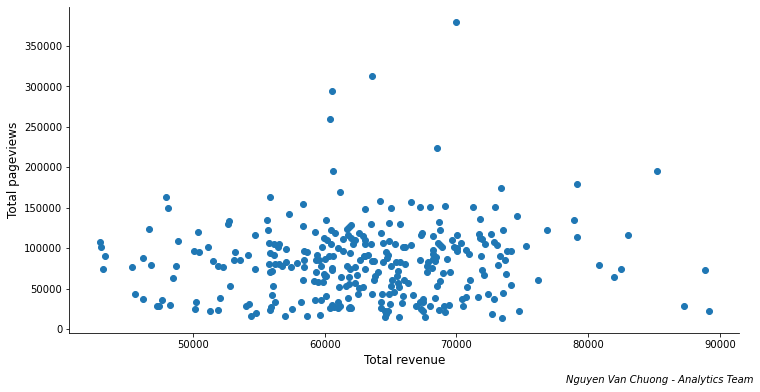

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(revenue_traffic['total_revenue'],revenue_traffic['total_pageviews'])

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
plt.xlabel('Total revenue', size=12)
plt.ylabel('Total pageviews', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

In [62]:
pearson_coef, p_value = stats.pearsonr(revenue_traffic['total_revenue'], revenue_traffic['total_pageviews'])
print("Correlation Coefficient is", pearson_coef.round(3))
print("Values P-value is ", p_value.round(3))

Correlation Coefficient is 0.075
Values P-value is  0.189


**Conclusion**: Total_revenue and Total_pageViews are not correlated with each other.

**Answer to Question 1:** There are no factors in website traffic data that impact revenue.

## Which products get us pageviews and revenue?



### Top 15 products bring the highest pageviews?

In [63]:
pageviews = traffics.groupby(["Brand","Product"]).agg(total_pageviews = ('pageviews','sum')).reset_index()

In [64]:
pageviews.sort_values('total_pageviews', ascending=False, inplace=True, ignore_index=True)

In [65]:
pageviews.head(15)

,Brand,Product,total_pageviews
0,So)zm5Pl^_G5t?q,sonEies-x0.139039192479287,232177.0
1,"Ac8IJsKH,4xtY.Tk",porQlease0.507911745358356,170599.0
2,PU]vXmX9fgf$xf!/,pumMvideo0.837931992780922,128891.8
3,BajeQM&IzKX.a8&_,besfeek-50.280274313298435,126771.0
4,LaX{ty9j_zZdD-\`,rogLrecap0.644396392507623,124284.2
5,Stc\9>Cqq;Rn&/|F,jefXaunch0.410067394635876,104984.2
6,"Ch6hNzXa,'=Q=)Wi",chrL-york0.372865344640649,103863.4
7,Wrv1Qv~}Dk7@']x3,wradaunch0.370927222684073,103850.0
8,An1a]{mE?nl\sM%&,angztered0.926486710136623,87999.6
9,Ai/cV(XG>`JN2Ln,goa]akers0.899516668943853,78523.6


In [66]:
top15_highestViews = pageviews.head(15).copy()

In [67]:
top15_highestViews.sort_values('total_pageviews', ascending=True, inplace=True, ignore_index=True)

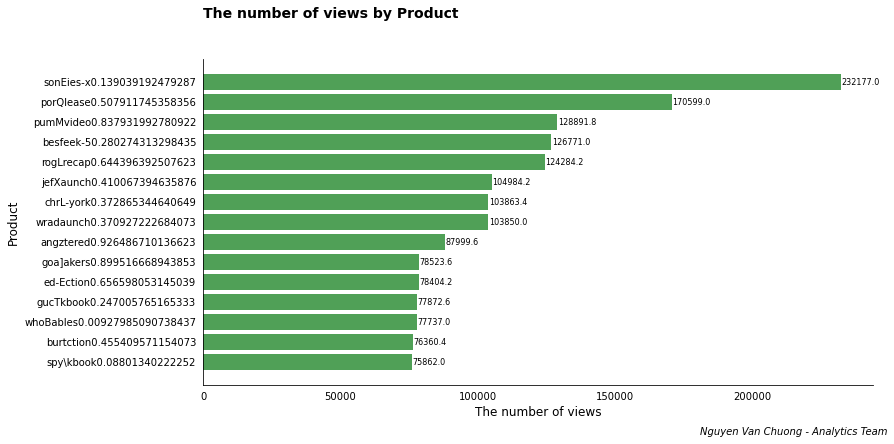

In [68]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(top15_highestViews['Product'],top15_highestViews['total_pageviews'],data=top15_highestViews,color='#50a057')

# Show data
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top15_highestViews.total_pageviews[i], xy=(p.get_width()+200, p.get_y()+p.get_height()/3))
    t1.set(size=8)
    i+=1
    
# remove the line above and to the right of the chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# remove ticks on 2 axes
ax.tick_params(left=False, bottom=False) 

# add title, label axes and source:
plt.suptitle('The number of views by Product', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('The number of views', size=12)
plt.ylabel('Product', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

### Top 15 products bring the lowest pageviews?

In [69]:
top15_lowestViews = pageviews.tail(15).copy().reset_index()


In [70]:
top15_lowestViews

,index,Brand,Product,total_pageviews
0,17874,Al_w1b7Rgo1[d5(t,wifHtream0.917888669521799,10.8
1,17875,Nes[8ukT8KBR8yVs,aur`bdrab0.327125310437019,10.8
2,17876,"BrDD!7Yg@jc""uls8",braBatter0.0782377325420137,8.0
3,17877,NiPea$n|Eu@<@>'L,nikklease0.491245756144684,5.6
4,17878,AmN]c$u[M;A^YJcU,in-Oaunch0.163562275754465,2.0
5,17879,Ma?Mwli9eyEN''@w,maju-date0.799046146817876,2.0
6,17880,Un3Iq;#h/1zA_`s?,undjcline0.806504582435603,1.8
7,17881,"Ve""""8X{n*HPW!bil",a-cClease0.167928605630817,1.6
8,17882,Ap!FulqmT[82a2/E,facQ-rise0.00977738420521201,0.8
9,17883,Yu%jaXeE/8L$d$yX,yunsement0.44148099082229,0.6


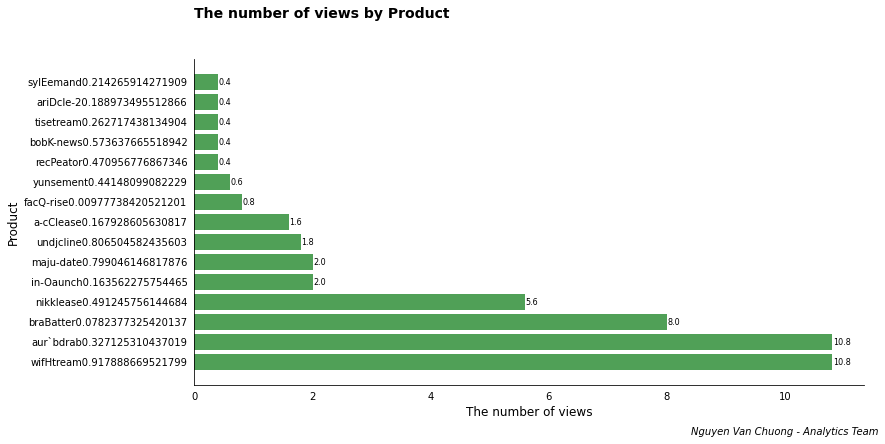

In [71]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(top15_lowestViews['Product'],top15_lowestViews['total_pageviews'],data=top15_lowestViews,color='#50a057')

# Show data
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top15_lowestViews.total_pageviews[i], xy=(p.get_width()+0.01, p.get_y()+p.get_height()/3))
    t1.set(size=8)
    i+=1
    
# remove the line above and to the right of the chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# remove ticks on 2 axes
ax.tick_params(left=False, bottom=False) 

# add title, label axes and source:
plt.suptitle('The number of views by Product', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('The number of views', size=12)
plt.ylabel('Product', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

### Top 15 products bring the highest revenue?

In [72]:
revenue = data.groupby(["Brand","Product"]).agg(total_revenue = ('SellPrice','sum')).reset_index()


In [73]:
revenue.sort_values('total_revenue', ascending=False, inplace=True, ignore_index=True)


In [74]:
revenue.head(15)


,Brand,Product,total_revenue
0,Il^(xPdB:S`#irqz,hypsrview0.321288570724117,11556.0
1,"Relp\+KJ?D,cWw0P",reeelease0.452821711209563,9205.0
2,"Ac8IJsKH,4xtY.Tk",audE-info0.884915261087885,8428.0
3,DiCo4(99zZ<nkafj,kinv-news0.29905739542661,7980.0
4,YMbpE$ev3qMx-h*E,ymc_orson0.319251813809483,7794.0
5,"BMh._Fx~""+dbZy|,",bmwk-20210.31690704020655,7686.0
6,Ap8r`F[}sfP_x007f_->SZ,ubeYanada0.100113795307302,7552.0
7,go@c<p.bPWb1nLrF,titM-info0.550757203954225,7520.0
8,Sa?9zXUH5iJbuE'S,samLement0.78565851365938,7518.0
9,DiL%1<G?YSFM_/TR,dioa-info0.750756927974235,7422.0


In [75]:
top15_highestRevenue = revenue.head(15).copy()


In [76]:
top15_highestRevenue.sort_values('total_revenue', ascending=True, inplace=True, ignore_index=True)


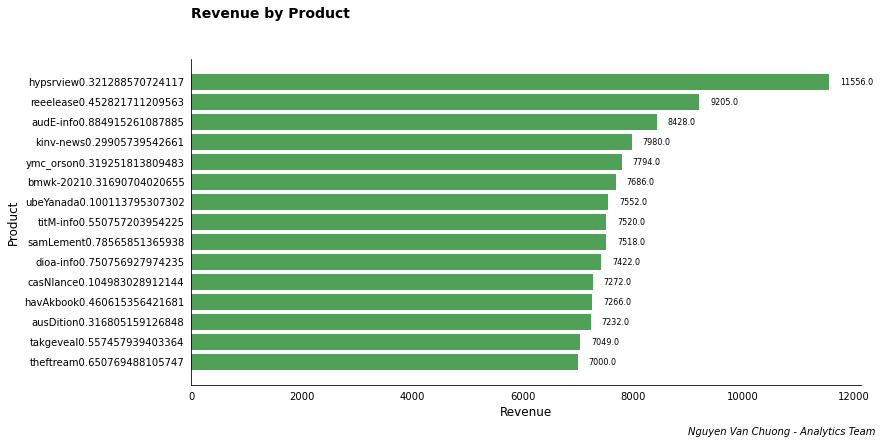

In [77]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(top15_highestRevenue['Product'],top15_highestRevenue['total_revenue'],data=top15_highestRevenue,color='#50a057')

# Show data
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top15_highestRevenue.total_revenue[i], xy=(p.get_width()+200, p.get_y()+p.get_height()/3))
    t1.set(size=8)
    i+=1
    
# remove the line above and to the right of the chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# remove ticks on 2 axes
ax.tick_params(left=False, bottom=False) 

# add title, label axes and source:
plt.suptitle('Revenue by Product', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('Revenue', size=12)
plt.ylabel('Product', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()


### Top 15 products bring the lowest revenue?

In [78]:
top15_lowestRevenue = revenue.tail(15).copy().reset_index()


In [79]:
top15_lowestRevenue


,index,Brand,Product,total_revenue
0,13527,Coi%hNfxcpJXpz^s,besAniche0.0507720075601127,92.0
1,13528,"Ja9<1F2\::?C,$Z=",hanGo-die0.172089095221113,90.0
2,13529,"MouDd/fn,XEARhBp",dar]lease0.881812150903457,90.0
3,13530,NFG8EHI_i=_x007f_H`jL>,wasd-info0.81977105870258,89.0
4,13531,NiPea$n|Eu@<@>'L,nikn-info0.248715190585489,86.0
5,13532,LoohpaJQ$v?;1-0b,polWkbook0.608294655546041,81.0
6,13533,Te/6_R<*I)Fc!@S:,teertream0.435511384141963,81.0
7,13534,Ap!FulqmT[82a2/E,secD-info0.408433946152434,78.0
8,13535,Ca@]7ed?aB@_Sdw(,canuement0.946238211030094,77.0
9,13536,Te-'32vNJ;E#BvCC,tenHx-toy0.234647410327591,74.0


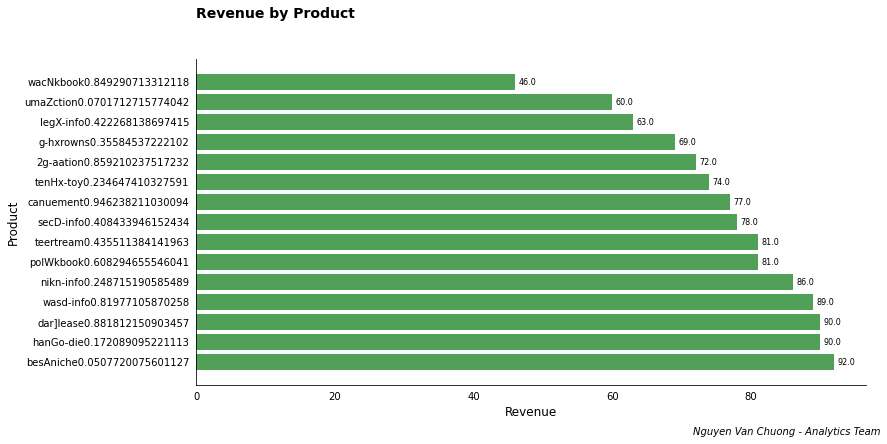

In [80]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(top15_lowestRevenue['Product'],top15_lowestRevenue['total_revenue'],data=top15_lowestRevenue,color='#50a057')

# Show data
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top15_lowestRevenue.total_revenue[i], xy=(p.get_width()+0.5, p.get_y()+p.get_height()/3))
    t1.set(size=8)
    i+=1
    
# remove the line above and to the right of the chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# remove ticks on 2 axes
ax.tick_params(left=False, bottom=False) 

# add title, label axes and source:
plt.suptitle('Revenue by Product', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('Revenue', size=12)
plt.ylabel('Product', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()


### Correlation between revenue and pageviews?

In [138]:
item_revenue = data.groupby(['Brand', 'Product']).agg(total_revenue = ('SellPrice','sum')).reset_index()
item_revenue


,Brand,Product,total_revenue
0,!lMifo~0~N65rM}2,skyK-date0.237469692167954,2715.0
1,#B_-`aDe`}CVt'!A,18-`lease0.952310074301681,478.0
2,#B_-`aDe`}CVt'!A,202rvideo0.0198947312483128,392.0
3,#B_-`aDe`}CVt'!A,6layenter0.832904875099387,1986.0
4,#B_-`aDe`}CVt'!A,a-cPrants0.941652415797535,1384.0
...,...,...,...
13537,"ze\yQP9Ju,s(O|>]",zel`video0.809705577564763,332.0
13538,"ze\yQP9Ju,s(O|>]",zelkvideo0.542849205536647,1052.0
13539,"ze\yQP9Ju,s(O|>]",zeloalbum0.673018009367897,3234.0
13540,Ét2:1))2]qB2`9;^,etua-baby0.472156023137423,1048.0


In [139]:
item_revenue.total_revenue.describe()

count    13542.000000
mean      1507.695909
std       1096.691381
min         46.000000
25%        742.000000
50%       1186.000000
75%       2042.750000
max      11556.000000
Name: total_revenue, dtype: float64

In [140]:
# Rank the levels of the total revenue based on the Q1, IQR, Q2
conditions = [(item_revenue['total_revenue'] < 742), \
            (item_revenue['total_revenue'] >= 742) & (item_revenue['total_revenue'] < 1186), \
            (item_revenue['total_revenue'] >= 1186) & (item_revenue['total_revenue'] < 2042), \
            (item_revenue['total_revenue'] >= 2042)]

values = ['Low', 'Medium', 'High', 'Very High']

item_revenue['ranking_revenue'] = np.select(conditions, values)


In [141]:
traffic_pageviews = traffics.groupby(['Brand', 'Product']).agg(pageviews = ('pageviews', 'sum')).reset_index()
traffic_pageviews

,Brand,Product,pageviews
0,!lMifo~0~N65rM}2,skyK-date0.237469692167954,102.0
1,#B_-`aDe`}CVt'!A,18-`lease0.952310074301681,1268.0
2,#B_-`aDe`}CVt'!A,202rvideo0.0198947312483128,113.2
3,#B_-`aDe`}CVt'!A,6layenter0.832904875099387,291.0
4,#B_-`aDe`}CVt'!A,8dixshirt0.0946466352557199,309.0
...,...,...,...
17884,"ze\yQP9Ju,s(O|>]",zeloalbum0.673018009367897,17.6
17885,Ét2:1))2]qB2`9;^,etua-baby0.472156023137423,1291.8
17886,Ét2:1))2]qB2`9;^,etujation0.0817298363167827,136.2
17887,Ét2:1))2]qB2`9;^,etuqt-day0.117221119496646,486.0


In [142]:
traffic_pageviews['pageviews'].describe()

count     17889.000000
mean       1592.936453
std        4412.133767
min           0.400000
25%         358.800000
50%         683.600000
75%        1499.800000
max      232177.000000
Name: pageviews, dtype: float64

In [143]:
# Rank the levels of the pageviews based on the Q1, IQR, Q2
condition = [(traffic_pageviews['pageviews'] < 358), \
            (traffic_pageviews['pageviews'] >= 358) & (traffic_pageviews['pageviews'] < 683), \
            (traffic_pageviews['pageviews'] >= 683) & (traffic_pageviews['pageviews'] < 1499), \
            (traffic_pageviews['pageviews'] >= 1499)]

value = ['Low', 'Medium', 'High', 'Very High']

traffic_pageviews['Ranking_pageviews'] = np.select(condition, value)

In [144]:
# Merge data
revenue_pageviews = item_revenue.merge(traffic_pageviews, left_on = ['Product', 'Brand'], right_on = ['Product', 'Brand'])
revenue_pageviews.sort_values(['pageviews', 'total_revenue'], ascending = False)

,Brand,Product,total_revenue,ranking_revenue,pageviews,Ranking_pageviews
532,"Ac8IJsKH,4xtY.Tk",porQlease0.507911745358356,2714.0,Very High,170599.0,Very High
8220,PU]vXmX9fgf$xf!/,pumMvideo0.837931992780922,3960.0,Very High,128891.8,Very High
1747,BajeQM&IzKX.a8&_,besfeek-50.280274313298435,2748.0,Very High,126771.0,Very High
5308,LaX{ty9j_zZdD-\`,rogLrecap0.644396392507623,1197.0,High,124284.2,Very High
9849,Stc\9>Cqq;Rn&/|F,jefXaunch0.410067394635876,484.0,Low,104984.2,Very High
...,...,...,...,...,...,...
11501,Yu%jaXeE/8L$d$yX,yunsement0.44148099082229,1128.0,Medium,0.6,Low
8103,OlDe}#G)yIt'+Bc3,recPeator0.470956776867346,3340.0,Very High,0.4,Low
10425,Tir72~+xaqy!(G\-,tisetream0.262717438134904,901.0,Medium,0.4,Low
278,"Ac8IJsKH,4xtY.Tk",bobK-news0.573637665518942,870.0,Medium,0.4,Low


In [154]:
# The products are both high-ranking_revenue and low-ranking_pageviews.
revenue_pageviews[(revenue_pageviews['ranking_revenue'] == 'Very High') & (revenue_pageviews['Ranking_pageviews'] == 'Low')]\
                                                .sort_values(['total_revenue', 'pageviews'], ascending = False)

,Brand,Product,total_revenue,ranking_revenue,pageviews,Ranking_pageviews
8983,"Relp\+KJ?D,cWw0P",reeelease0.452821711209563,9205.0,Very High,281.8,Low
11458,YMbpE$ev3qMx-h*E,ymc_orson0.319251813809483,7794.0,Very High,223.2,Low
3288,Exa~e4sZi*|fpD<^,ausDition0.316805159126848,7232.0,Very High,161.4,Low
6153,Mi+QB'FqF;cGT)Y',theftream0.650769488105747,7000.0,Very High,350.2,Low
8787,Ra&3X!d15ID^=sus,raejement0.618482160856154,6860.0,Very High,342.4,Low
...,...,...,...,...,...,...
10209,"Th/mp_89*Fq},z40",theZg-ito0.351036960583246,2050.0,Very High,353.6,Low
5570,Lo:}7^:YFSc4xYIs,ireM-news0.257234450575393,2048.0,Very High,243.6,Low
5367,Le[cbuI/Q[BdoWvx,a-ng-info0.0548323007969564,2046.0,Very High,304.8,Low
4226,He@H.e{jPXaUHUF(,hers-20200.0596337799394938,2044.0,Very High,234.4,Low


In [155]:
# The products are both low-ranking_revenue and high-ranking_pageviews.
revenue_pageviews[(revenue_pageviews['ranking_revenue'] == 'Low') & (revenue_pageviews['Ranking_pageviews'] == 'Very High')]\
                                                .sort_values(['total_revenue', 'pageviews'], ascending = False)

,Brand,Product,total_revenue,ranking_revenue,pageviews,Ranking_pageviews
10625,Tr1)L/A]=of['Qhn,chaPtopia0.305759133071658,741.0,Low,1906.0,Very High
11872,ad(;%f6iD'}9EHD[,whil-info0.511259246630254,741.0,Low,1737.6,Very High
1308,Ap!FulqmT[82a2/E,youTcture0.944314892191284,740.0,Low,3566.4,Very High
7750,NiPea$n|Eu@<@>'L,niku5-3000.815662316070307,740.0,Low,2231.6,Very High
7475,NiPea$n|Eu@<@>'L,nik\-info0.17636213285294,740.0,Low,2175.4,Very High
...,...,...,...,...,...,...
3054,Dr|vm[-5p~56Y\mk,dj-lement0.523355253367032,103.0,Low,2536.6,Very High
2581,Coi%hNfxcpJXpz^s,besAniche0.0507720075601127,92.0,Low,1586.0,Very High
1300,Ap!FulqmT[82a2/E,secD-info0.408433946152434,78.0,Low,6494.4,Very High
10126,Te-'32vNJ;E#BvCC,tenHx-toy0.234647410327591,74.0,Low,2217.4,Very High


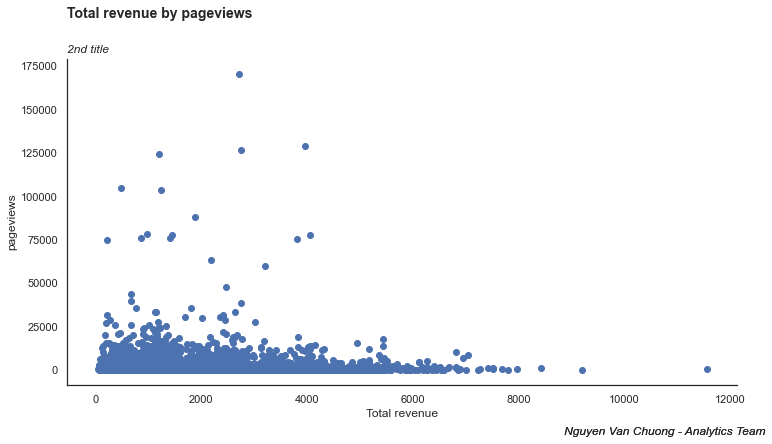

In [153]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(revenue_pageviews['total_revenue'],revenue_pageviews['pageviews'])

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
plt.xlabel('total_revenue', size=12)
plt.ylabel('pageviews', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

# thêm title, label các trục và source:
plt.suptitle('Total revenue by pageviews', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('Total revenue', size=12)
plt.ylabel('pageviews', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

In [151]:
pearson_coef, p_value = stats.pearsonr(revenue_pageviews['total_revenue'], revenue_pageviews['pageviews'])
print("Correlation Coefficient is", pearson_coef.round(3))
print("Values P-value is ", p_value.round(3))

Correlation Coefficient is 0.016
Values P-value is  0.07


## What customer segments are there?    


### Setup data

In [84]:
customer_data = data.groupby(["CustomerID","FirstName", "LastName","Country","Birthday","DateJoined","Newsletter"]).\
                            agg(total_expenditures = ('SellPrice','sum')).\
                            reset_index()

In [85]:
customer_data

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,total_expenditures
0,0.0,V0.296680287495188,L0.104646531512644,FR - France,1968-02-03,2015-12-18,N,32997.0
1,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,34948.0
2,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,17879.0
3,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,14603.0
4,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,37029.0
...,...,...,...,...,...,...,...,...
765,765.0,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,1989-10-25,2016-09-05,N,29538.0
766,766.0,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,1965-07-25,2016-09-05,Y,5331.0
767,767.0,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,1980-11-07,2016-09-05,Y,45470.0
768,768.0,Y0.286774649994125,Aung0.752567424443609,GER - Germany,1980-09-17,2016-09-05,Y,35462.0


In [87]:

today = date.today()

# Calculate age
customer_data['Age'] = range(len(customer_data['Birthday']))
for i in range(len(customer_data['Birthday'])):
    customer_data['Age'][i] = today.year - customer_data['Birthday'][i].year

# Calculate Loyalty
customer_data['Loyalty'] = range(len(customer_data['DateJoined']))
for i in range(len(customer_data['DateJoined'])):
    customer_data['Loyalty'][i] = today.year - customer_data['DateJoined'][i].year

<ipython-input-87-1c69ac89a0bb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Age'][i] = today.year - customer_data['Birthday'][i].year
<ipython-input-87-1c69ac89a0bb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Loyalty'][i] = today.year - customer_data['DateJoined'][i].year


In [88]:
customer_data

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,total_expenditures,Age,Loyalty
0,0.0,V0.296680287495188,L0.104646531512644,FR - France,1968-02-03,2015-12-18,N,32997.0,54,7
1,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,34948.0,13,7
2,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,17879.0,32,7
3,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,14603.0,48,7
4,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,37029.0,41,7
...,...,...,...,...,...,...,...,...,...,...
765,765.0,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,1989-10-25,2016-09-05,N,29538.0,33,6
766,766.0,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,1965-07-25,2016-09-05,Y,5331.0,57,6
767,767.0,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,1980-11-07,2016-09-05,Y,45470.0,42,6
768,768.0,Y0.286774649994125,Aung0.752567424443609,GER - Germany,1980-09-17,2016-09-05,Y,35462.0,42,6


In [89]:
customer_seg = customer_data.merge(customer_info[['ID','Gender']],how='inner',left_on='CustomerID', right_on='ID')


In [90]:
customer_seg.drop('ID', inplace=True, axis=1)


In [91]:
customer_seg

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,total_expenditures,Age,Loyalty,Gender
0,0.0,V0.296680287495188,L0.104646531512644,FR - France,1968-02-03,2015-12-18,N,32997.0,54,7,NaN
1,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,34948.0,13,7,M
2,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,17879.0,32,7,F
3,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,14603.0,48,7,M
4,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,37029.0,41,7,M
...,...,...,...,...,...,...,...,...,...,...,...
765,765.0,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,1989-10-25,2016-09-05,N,29538.0,33,6,F
766,766.0,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,1965-07-25,2016-09-05,Y,5331.0,57,6,NaN
767,767.0,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,1980-11-07,2016-09-05,Y,45470.0,42,6,M
768,768.0,Y0.286774649994125,Aung0.752567424443609,GER - Germany,1980-09-17,2016-09-05,Y,35462.0,42,6,M


### EDA

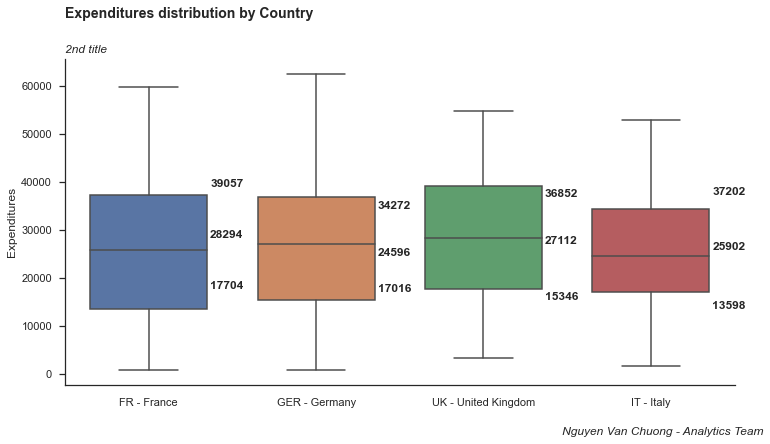

In [38]:
sns.set(rc={'figure.figsize':(12, 6)})
sns.set_style("white")

# calculate the median, q1, q3, min, max indexes on the chart
median_list = customer_seg.groupby('Country')['total_expenditures'].median()
q1_list = customer_seg.groupby('Country')['total_expenditures'].quantile(0.25)
q3_list = customer_seg.groupby('Country')['total_expenditures'].quantile(0.75)
min_list = customer_seg.groupby('Country')['total_expenditures'].min()
max_list = customer_seg.groupby('Country')['total_expenditures'].max()

# draw boxplot
box_width=0.7
box1 = sns.boxplot(x='Country', y='total_expenditures', data=customer_seg, width=box_width)

# show data
# show medians
i = 0
for i in range(len(median_list)):
    x = i+box_width/2*1.05
    y = median_list[len(median_list)-i-1]
    box1.annotate('%.0f' %median_list[len(median_list)-i-1], # because median_list is in reverse order of group_var values compared to plot, so it must be indexed like that
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )
# show q1
i = 0
for i in range(len(q1_list)):
    x = i+box_width/2*1.05
    y = q1_list[len(q1_list)-i-1]
    box1.annotate('%.0f' %q1_list[len(q1_list)-i-1], # Since q1_list order of values is group_var opposite to the plot, it must be indexed as such
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )
    
# show q3
i = 0
for i in range(len(q3_list)):
    x = i+box_width/2*1.05
    y = q3_list[len(q3_list)-i-1]
    box1.annotate('%.0f' %q3_list[len(q3_list)-i-1], # Since q3_list order of values is group_var opposite to the plot, it must be indexed as such
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )
    
# remove the line above and to the right of the chart
spines = ['top', 'right']
for s in spines:
    box1.spines[s].set_visible(False) 
    
# remove the tick on the x . axis
box1.tick_params(left=True, bottom=False) 

# add title, label axes and source:
plt.suptitle('Expenditures distribution by Country', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('', size=12)
plt.ylabel('Expenditures', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

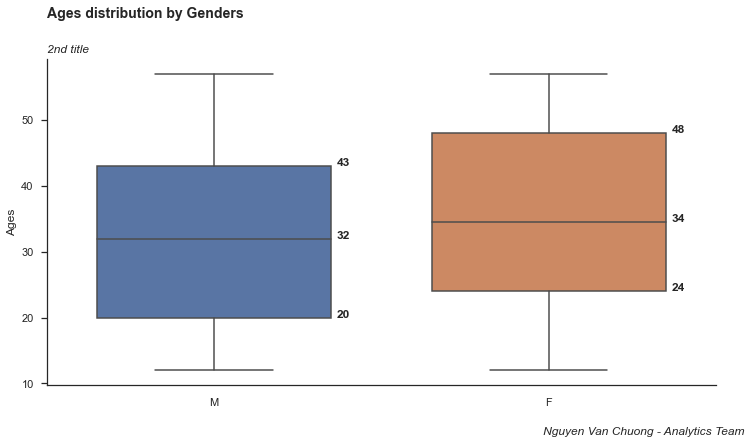

In [40]:
sns.set(rc={'figure.figsize':(12, 6)})
sns.set_style("white")

# Calculated indexes median, q1, q3, min, max to chart
median_list = customer_seg.groupby('Gender')['Age'].median()
q1_list = customer_seg.groupby('Gender')['Age'].quantile(0.25)
q3_list = customer_seg.groupby('Gender')['Age'].quantile(0.75)
min_list = customer_seg.groupby('Gender')['Age'].min()
max_list = customer_seg.groupby('Gender')['Age'].max()

# Draw boxplot
box_width=0.7
box1 = sns.boxplot(x='Gender', y='Age', data=customer_seg, width=box_width)

# show data
# show medians
i = 0
for i in range(len(median_list)):
    x = i+box_width/2*1.05
    y = median_list[len(median_list)-i-1]
    box1.annotate('%.0f' %median_list[len(median_list)-i-1], # because median_list is in reverse order of group_var values ​​compared to plot, so it must be indexed like that
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )
# show q1
i = 0
for i in range(len(q1_list)):
    x = i+box_width/2*1.05
    y = q1_list[len(q1_list)-i-1]
    box1.annotate('%.0f' %q1_list[len(q1_list)-i-1], # because q1_list has the reverse order of group_var values ​​compared to plot, so it must be indexed like that
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )
    
# show q3
i = 0
for i in range(len(q3_list)):
    x = i+box_width/2*1.05
    y = q3_list[len(q3_list)-i-1]
    box1.annotate('%.0f' %q3_list[len(q3_list)-i-1], # because q3_list has the reverse order of group_var values ​​compared to plot, so it must be indexed like that
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )
    
# remove the line above and to the right of the chart
spines = ['top', 'right']
for s in spines:
    box1.spines[s].set_visible(False) 
    
# remove the tick on the x . axis
box1.tick_params(left=True, bottom=False) 

# add title, label axes and source:
plt.suptitle('Ages distribution by Genders', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('', size=12)
plt.ylabel('Ages', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Conclusion:** there is no much difference in spending levels between these two loyalties and there are no outliers.

**Conclusion:** All four capitals have spending levels ranging from over 10,000(USD) to nearly 40,000(USD). At the same time, there is no much difference in spending levels between these four capitals and there are no outliers.

### Data preprocessing

#### Label Encoding


In [92]:
customer_seg.dtypes.unique()

array([dtype('float64'), dtype('O'), dtype('<M8[ns]'), dtype('int64')],
      dtype=object)

In [121]:
segment = customer_seg.copy()
segment.head(1)

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,total_expenditures,Age,Loyalty,Gender
0,0.0,V0.296680287495188,L0.104646531512644,FR - France,1968-02-03,2015-12-18,N,32997.0,54,7,NaN


In [122]:
# Use the set calculation to get the columns of categorical features
num_cols = segment._get_numeric_data().columns
cat_cols = set(segment.columns) - set(num_cols)

print(list(cat_cols))

['Newsletter', 'DateJoined', 'Country', 'Birthday', 'Gender', 'FirstName', 'LastName']


In [123]:
le = LabelEncoder()

for i in cat_cols:
    segment[i] = segment[[i]].apply(le.fit_transform)
    
segment[cat_cols].head(2)

,Newsletter,DateJoined,Country,Birthday,Gender,FirstName,LastName
0,0,31,0,49,2,506,232
1,1,32,1,741,1,44,242


#### Standardization


In [124]:
data_scaled = segment.copy()


# Newsletter, Loyalty and Gender fields contain limited values that are not suitable for customer clustering. 
# CustomerID, FirstName, LastName, Birthday, DateJoined fields don't contain much meaning to customers clustering.

drop_cols = ['CustomerID', 'Birthday', 'FirstName', 'LastName', 'DateJoined', 'Loyalty', 'Newsletter', 'Country', 'Gender']
data_scaled.drop(columns = drop_cols, axis = 1, inplace = True)

print(data_scaled.shape)

(770, 2)


In [125]:
data_scaled

,total_expenditures,Age
0,32997.0,54
1,34948.0,13
2,17879.0,32
3,14603.0,48
4,37029.0,41
...,...,...
765,29538.0,33
766,5331.0,57
767,45470.0,42
768,35462.0,42


In [126]:
scale_cols = ['total_expenditures', 'Age']

In [127]:
ss = StandardScaler()

for col in scale_cols:
    data_scaled[col] = ss.fit_transform(data_scaled[[col]])
    
display(data_scaled.shape, data_scaled.head(3))

(770, 2)

,total_expenditures,Age
0,0.479662,1.544695
1,0.624054,-1.602718
2,-0.639206,-0.144161


### Dimensionality Reduction


In [128]:
variance_ratio = {}

for i in range(1, len(data_scaled.columns)+1):
    pca = PCA(n_components=i)
    pca.fit(data_scaled)
    variance_ratio[f'n_{i}'] = pca.explained_variance_ratio_.sum()

In [129]:
variance_ratio

{'n_1': 0.5033918545123577, 'n_2': 1.0}

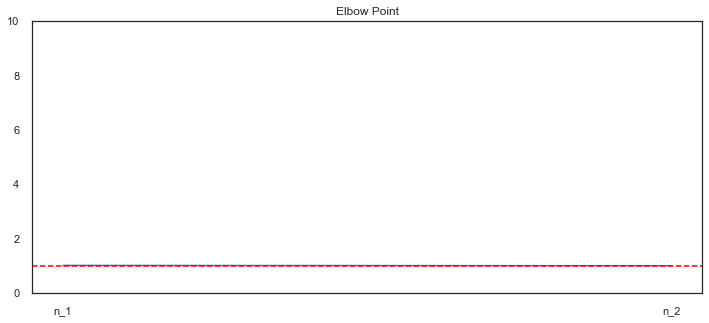

In [130]:
# eigen value
eigen_value = np.sort(pca.explained_variance_)[::-1]

plt.figure(figsize=(12, 5))

plt.plot(variance_ratio.keys(), eigen_value)
plt.ylim(0, 10, 1)
plt.axhline(1, color = 'red', ls = '--')
plt.title('Elbow Point')

plt.show()

In [131]:
# eigen value
eigen_value

array([1.00809292, 0.99450786])

In [132]:
print(f'the number of eigenvalue greater than one: {len(eigen_value[eigen_value > 1])}')


the number of eigenvalue greater than one: 1


In [135]:
pca = PCA(n_components = 1, random_state = 42)

pca.fit(data_scaled)
data_pca = pd.DataFrame(pca.transform(data_scaled), 
                        columns = (["PC1"]))

data_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,770.0,-1.845566e-17,1.004038,-2.427659,-0.707849,0.012207,0.715837,2.433561


### K-Means algorithm


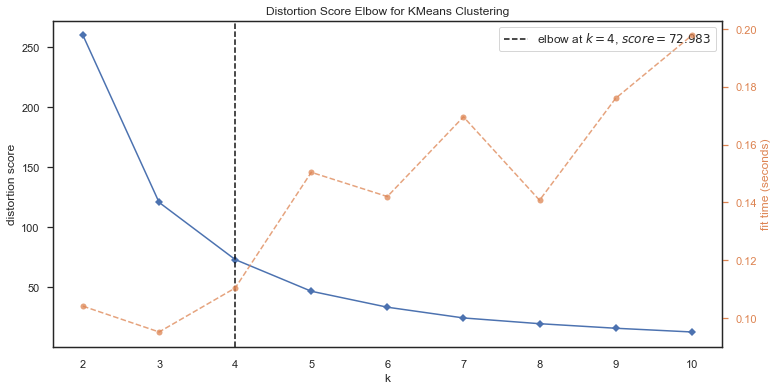

In [136]:
km = KMeans()
Elbow_M = KElbowVisualizer(estimator = km, k = 10)
Elbow_M.fit(data_pca)
Elbow_M.show()

plt.show()

In [137]:
km = KMeans(n_clusters=4, random_state=42)

yhat_AC = km.fit_predict(data_pca)

data_pca["Clusters"] = yhat_AC   # for evaluating the model
segment["Clusters"]= yhat_AC        # for customers profiling

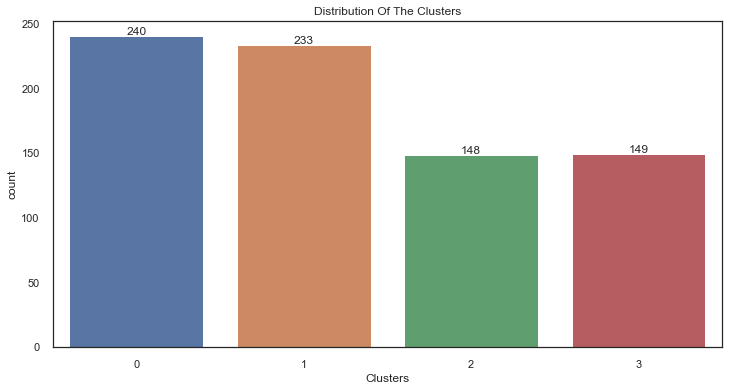

In [140]:
# Plotting countplot of clusters

ax = sns.countplot(x=segment["Clusters"])
ax.bar_label(ax.containers[0])
ax.set_title("Distribution Of The Clusters")
plt.show()

In [159]:
pal = ['red', 'blue', 'green', 'orange']

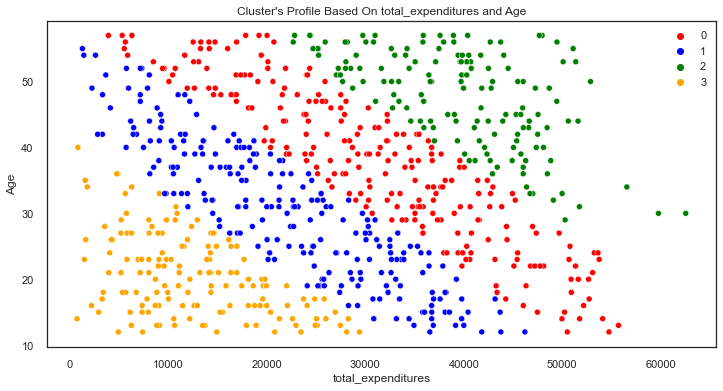

In [161]:
ax = sns.scatterplot(data = segment,x=segment["total_expenditures"], y=segment["Age"],hue=segment["Clusters"], palette=pal)
ax.set_title("Cluster's Profile Based On total_expenditures and Age")
plt.legend()
plt.show()

**Conclusion:**  The customer segment is divided into 4 groups:

- **Cluster 0:** The group of customers under the age of 40, whose spending ranges from over $0 to nearly $30,000. For the most part, customers under the age of 20 spend the most money with ranges from over $10,000 to nearly $30,000. 
- **Cluster 1:** The group of customers under the age of 60, whose spending ranges from over $0 to nearly $50,000. For the most part, customers from the age of 20 to the age of 30 spend the most money with ranges from over $10,000 to nearly $40,000.
- **Cluster 2:** The group of customers under the age of 60, whose spending ranges from over $5,000 to nearly $55,000. For the most part, customers from the age of 30 to the age of 40 spend the most money with ranges from over $20,000 to nearly $45,000.
- **Cluster 3:** The group of customers under the age of 60, whose spending ranges from over $20,000 to nearly $65,000. For the most part, customers from the age of 40 to the age of 60 spend the most money with ranges from over $20,000 to nearly $65,000.

In [169]:
cluster_0 = segment.loc[segment.Clusters ==0, ["CustomerID", "Age", "total_expenditures"]]
cluster_0

,CustomerID,Age,total_expenditures
3,3.0,48,14603.0
6,6.0,38,26459.0
7,7.0,52,13925.0
9,9.0,38,36807.0
20,20.0,31,35374.0
...,...,...,...
748,748.0,56,14754.0
757,757.0,24,40738.0
765,765.0,33,29538.0
766,766.0,57,5331.0


In [178]:
cluster_0.to_csv(r'E:\MindX\Khóa 4 - DA Summary\Buổi 8\Fashion selling data\Clusters\cluster_0.csv', index = False, header = True)

In [179]:
cluster_1 = segment.loc[segment.Clusters ==1, ["CustomerID", "Age", "total_expenditures"]]
cluster_1

,CustomerID,Age,total_expenditures
1,1.0,13,34948.0
2,2.0,32,17879.0
8,8.0,31,23187.0
11,11.0,35,17901.0
15,15.0,25,24647.0
...,...,...,...
747,747.0,13,40013.0
755,755.0,20,39251.0
756,756.0,37,16234.0
759,759.0,38,9054.0


In [180]:
cluster_1.to_csv(r'E:\MindX\Khóa 4 - DA Summary\Buổi 8\Fashion selling data\Clusters\cluster_1.csv', index = False, header = True)

In [181]:
cluster_2 = segment.loc[segment.Clusters ==2, ["CustomerID", "Age", "total_expenditures"]]
cluster_2

,CustomerID,Age,total_expenditures
0,0.0,54,32997.0
4,4.0,41,37029.0
5,5.0,43,36913.0
10,10.0,41,41584.0
12,12.0,38,40555.0
...,...,...,...
751,751.0,40,42116.0
758,758.0,57,37600.0
760,760.0,50,45492.0
761,761.0,45,45800.0


In [182]:
cluster_2.to_csv(r'E:\MindX\Khóa 4 - DA Summary\Buổi 8\Fashion selling data\Clusters\cluster_2.csv', index = False, header = True)

In [183]:
cluster_3 = segment.loc[segment.Clusters ==3, ["CustomerID", "Age", "total_expenditures"]]
cluster_3

,CustomerID,Age,total_expenditures
13,13.0,19,15876.0
14,14.0,16,9055.0
16,16.0,22,9568.0
18,18.0,16,11476.0
24,24.0,27,5834.0
...,...,...,...
753,753.0,23,10295.0
754,754.0,16,16266.0
762,762.0,12,20811.0
763,763.0,15,20397.0


In [184]:
cluster_3.to_csv(r'E:\MindX\Khóa 4 - DA Summary\Buổi 8\Fashion selling data\Clusters\cluster_3.csv', index = False, header = True)